DNA Sequencing with Machine Learning 

- A genome is a complete collection of DNA in an organism, and human genome has about 6 billion characters or letters. If you think the genome(the complete DNA sequence) is like a book, it is a book about 6 billion letters of “A”, “C”, “G” and “T”. Everyone has a unique genome. 
- Genomics extensively utilizes machine learning to capture dependencies in data and infer new biological hypotheses.
- Potential to extract new insights from the exponentially increasing volume of genomics data requires powerful machine learning models.
- In this project, I have explored the structure of human genomes/ DNA samples and how machine learning algorithms can be used to build a prediction model on DNA sequence data for Humans and applied the same to test precision on Chimpanzee DNA data.

DNA raw data processing using Biopython

Steps: 
1. Read DNA sequence in fasta format using Biopython. The sequence object will sequence and length of the sequence
2. Used Bio.SeqIO from Biopython for parsing DNA sequence data(fasta). 

In [34]:
from Bio import SeqIO
for sequence in SeqIO.parse('Data/rcsb_pdb_4D2I.fasta', "fasta"):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

4D2I_1|Chains
MIIGYVIGQATTQEALILAERPVRLGTYVVLEYDNVKALGLITNVTRGSPLLDDNMNDIEIVQRLKQFNNSIPVYTKAKVKLLCDMNNHFLMPDIPPFAGTPAREAEDEELKSIYSQDGQIRIGSLIGKNVEVKLNINSFARHLAILAATGSGKSNTVAVLSQRISELGGSVLIFDYHGEYYDSDIKNLNRIEPKLNPLYMTPREFSTLLEIRENAIIQYRILRRAFIKVTNGIRAALAAGQIPFSTLNSQFYELMADALETQGNSDKKSSAKDEVLNKFEEFMDRYSNVIDLTSSDIIEKVKRGKVNVVSLTQLDEDSMDAVVSHYLRRILDSRKDFKRSKNSGLKFPIIAVIEEAHVFLSKNENTLTKYWASRIAREGRKFGVGLTIVSQRPKGLDENILSQMTNKIILKIIEPTDKKYILESSDNLSEDLAEQLSSLDVGEAIIIGKIVKLPAVVKIDMFEGKLLGSDPDMIGEWKKVAASEKIAKGFADFGTEIGD
500


Machine learning or deep learning models need the input as feature matrices or numerical values.
So we need to encode these characters/ string data into matrices. 

Some approaches to encode DNA sequence data:
1. Ordinal encoding DNA Sequence
2. One-hot encoding DNA Sequence
3. DNA sequence as a “language”, known as k-mer counting

Below steps checks which of the approaches gives us the workable input features.

Approach 1: Ordinal encoding DNA sequence data

1. To encode each nitrogen bases as ordinals; “ATGC” becomes [0.25, 0.5, 0.75, 1.0]. “N” can be a 0. 
2. Creating a NumPy array object and a label encoder with the DNA sequence alphabet “a”, “c”, “g” and “t”, “n”.

In [35]:
import numpy as np
import re

def string_array(seq_str):
   seq_str = seq_str.lower()
   seq_str = re.sub('[^acgt]', 'n', seq_str)
   seq_str = np.array(list(seq_str))
   return seq_str

# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
label_enc.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

In [36]:
#Define function to encode a DNA sequence string as an ordinal vector which returns a NumPy array 
# With A=0.25, C=0.50, G=0.75, T=1.00, n=0.00.

def ord_enc(array):
    int_enc = label_enc.transform(array)
    float_enc = int_enc.astype(float)
    float_enc [float_enc  == 0] = 0.25 # A
    float_enc [float_enc  == 1] = 0.50 # C
    float_enc [float_enc  == 2] = 0.75 # G
    float_enc [float_enc  == 3] = 1.00 # T
    float_enc [float_enc  == 4] = 0.00 # anything else, lets say n
    return float_enc 


#Let’s try it out a simple short sequence:
seq_test = 'TTCAGCCAGTG'
ord_enc(string_array(seq_test))

array([1.  , 1.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 1.  , 0.75])

Approach 2: One-hot encoding DNA Sequence

1. Applied to algorithms such as convolutional neural networks. “ATGC” would become [0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]. 
2. So the one-hot encoded vectors can either be concatenated or turned into 2D arrays.

In [37]:
from sklearn.preprocessing import OneHotEncoder
def oh_enc(seq_str):
    int_enc = label_enc.transform(seq_str)
    oh_enc = OneHotEncoder(sparse=False, dtype=int)
    int_enc = int_enc.reshape(len(int_enc), 1)
    oh_enc = oh_enc.fit_transform(int_enc)
    oh_enc = np.delete(oh_enc, -1, 1)
    return oh_enc

seq_test = 'CGTTTCAGTCGCC'
oh_enc(string_array(seq_test))

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

Limitations:  
1. Above approaches doesn't give vectors of uniform length required as input for classification or regression algorithms. 
2. Truncating sequences or padding with “n” or “0” is required for vectors of uniform length.

Approach 3: k-mer counting

1. DNA is the language of life, and encoding this DNA language showcases instructions, functions for molecules in organisms
2. Natural language processing(NLP) is applied to encode the natural language of DNA and protein sequences.
3. Approach is to take the DNA sequences and break into k-mer length overlapping “words”.  
4. In genomics, this approach is called “k-mer counting”, or counting the occurrences of each possible k-mer sequence using NLP (Python natural language processing) tools.


In [38]:
# BELOW FUNCTION returns a list of k-mer “words” and then can be joined into a “sentence”. 
def Kmers(seq, size):
    return [seq[x: x+size].lower() for x in range(len(seq) - size + 1)]
seq = 'GTTAAGCCTTCCAGCTAGTGACGACTGCA'
Kmers(seq, size=8)

['gttaagcc',
 'ttaagcct',
 'taagcctt',
 'aagccttc',
 'agccttcc',
 'gccttcca',
 'ccttccag',
 'cttccagc',
 'ttccagct',
 'tccagcta',
 'ccagctag',
 'cagctagt',
 'agctagtg',
 'gctagtga',
 'ctagtgac',
 'tagtgacg',
 'agtgacga',
 'gtgacgac',
 'tgacgact',
 'gacgactg',
 'acgactgc',
 'cgactgca']

In [39]:
words = Kmers(seq, size=6)
join = ' '.join(words)

Seq1 = 'ATCCTAGCATGGCTTAAACGGTCCA'
Seq2 = 'TCAAGTTACGGTAATATATTAGGCA'
Sen1 = ' '.join(Kmers(Seq1, size=8))
Sen2 = ' '.join(Kmers(Seq2, size=8))

from sklearn.feature_extraction.text import CountVectorizer #Create Words model
cv = CountVectorizer()
X = cv.fit_transform([join, Sen1, Sen2]).toarray()

X #vectorized dataset

array([[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]])

Final Objective: 

1. Build classification model that is trained on dataset of human DNA sequences 
2. NB Classification Model predicts a gene family based on the DNA sequence of the coding sequence. 
3. To test the model, datasets with humans and chimpanzee DNA sequences are used 
4. Finally, accuracies are compared

7 families of Human Genes classified into 0-6 labels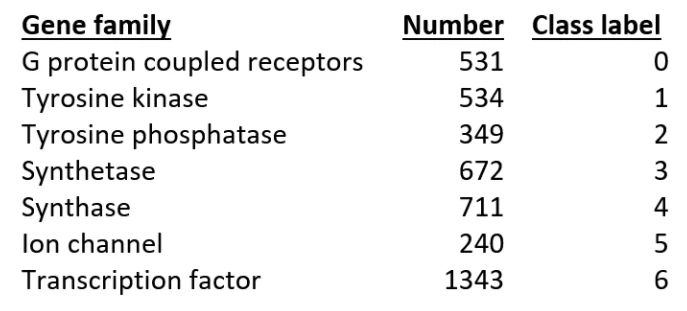 

In [40]:
import numpy as np  
import pandas as pd  
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
humansDNA = pd.read_table('Data/human_data.txt')
humansDNA.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class Distribution of Human DNA')

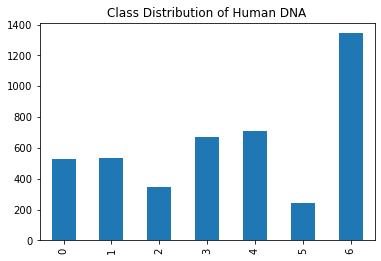

In [42]:
humansDNA['class'].value_counts().sort_index().plot.bar()
plt.title("Class Distribution of Human DNA")

In [43]:
#Load chimpanzee DNA dataset for classification
chimpDNA = pd.read_table('Data/chimp_data.txt')
chimpDNA.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Class Distribution of Chimpanzee DNA')

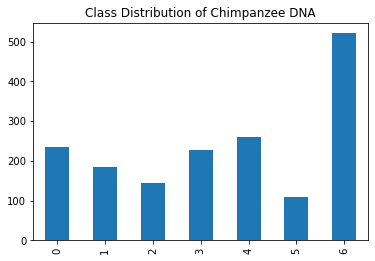

In [44]:
chimpDNA['class'].value_counts().sort_index().plot.bar()
plt.title("Class Distribution of Chimpanzee DNA")

Next step is to convert a sequence of characters into k-mer words, default size = 8 (octamers). 
Kmers() will collect all possible overlapping k-mers from any sequence string.

In [45]:
def Kmers(seq, size=8):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#convert DNA sequences into short overlapping k-mers 
humansDNA['words'] = humansDNA.apply(lambda x: Kmers(x['sequence']), axis=1)
humansDNA = humansDNA.drop('sequence', axis=1)

chimpDNA['words'] = chimpDNA.apply(lambda x: Kmers(x['sequence']), axis=1)
chimpDNA = chimpDNA.drop('sequence', axis=1)

In [46]:
humansDNA.tail()

,class,words
4375,0,"[atggaaga, tggaagat, ggaagatt, gaagattt, aagat..."
4376,6,"[atgcagtc, tgcagtcc, gcagtcct, cagtcctt, agtcc..."
4377,6,"[atgcagtc, tgcagtcc, gcagtcct, cagtcctt, agtcc..."
4378,6,"[atggggca, tggggcac, ggggcacc, gggcacct, ggcac..."
4379,6,"[atgcagtc, tgcagtcc, gcagtcct, cagtcctt, agtcc..."


Next step is to convert k-mers for each gene into string sentences of words that can be used to create the Bag of Words model.  

In [47]:
humantexts = list(humansDNA['words'])
for item in range(len(humantexts)):
    humantexts[item] = ' '.join(humantexts[item])
yHuman = humansDNA.iloc[:, 0].values # fetching class values from Human DNA dataset

chimptexts = list(chimpDNA['words'])
for item in range(len(chimptexts)):
    chimptexts[item] = ' '.join(chimptexts[item])
yChimp = chimpDNA.iloc[:, 0].values  # fetching class values from chimpanzee DNA dataset

yHuman

array([4, 4, 3, ..., 6, 6, 6])

Now using CountVectorizer() equivalent to k-mer counting. And convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #n-gram size of 4 determined by testing  
XHuman = cv.fit_transform(humantexts)
XChimp = cv.transform(chimptexts)

print(XHuman.shape)
print(XChimp.shape)

(4380, 1025992)
(1682, 1025992)


1. DNA sequences are transformed into uniform length numerical vectors in the form of k-mer counts and ngrams
2. Build a classification model that can predict the DNA sequence function based on the sequence itself.

Human data is used to train the model (25% data for testing).
Challenge the model’s generalizability by trying to predict sequence function in chimpanzee.
Train/test split human dataset and build simple multinomial naive Bayes classifier.

In [49]:
# Splitting dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XHuman, yHuman,test_size = 0.25, random_state=42)                                     

In [50]:
# build the classifier model using NB multinomial function
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [51]:
# Test predictions on the humans test set and verify model performance metrics
y_Prd = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Predictions matrix on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_Prd, name='Predicted')))

def get_metrics(y_test, y_Prd):
    accuracy = accuracy_score(y_test, y_Prd)
    precision = precision_score(y_test, y_Prd, average='weighted')
    recall = recall_score(y_test, y_Prd, average='weighted')
    f1 = f1_score(y_test, y_Prd, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_Prd)

print("Accuracy = %.2f   Precision = %.2f  Recall = %.2f   f1 = %.2f" % (accuracy, precision, recall, f1))

Predictions matrix on human test DNA sequence

Predicted    0    1   2    3    4   5    6
Actual                                    
0          111    0   0    0    1   9    0
1            0  129   0    0    0   2    0
2            0    0  92    0    1   0    0
3            0    0   0  149    0   1    0
4            0    0   0    0  179   5    0
5            0    1   0    0    0  64    0
6            0    0   0    0    3  19  329
Accuracy = 0.96   Precision = 0.97  Recall = 0.96   f1 = 0.96


Am getting nearly precise results from testing, hence our model did not overfit to training data.  

In [52]:
# Test predictions on the Chimpanzee set which should be very similar to humans
y_PrdChimp = classifier.predict(XChimp)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Predictions matrix on chimp test DNA sequence\n")
print(pd.crosstab(pd.Series(yChimp, name='Actual'), pd.Series(y_PrdChimp, name='Predicted')))

def get_metrics(yChimp, y_PrdChimp):
    accuracy = accuracy_score(yChimp, y_PrdChimp)
    precision = precision_score(yChimp, y_PrdChimp, average='weighted')
    recall = recall_score(yChimp, y_PrdChimp, average='weighted')
    f1 = f1_score(yChimp, y_PrdChimp, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(yChimp, y_PrdChimp)

print("Accuracy = %.2f   Precision = %.2f  Recall = %.2f   f1 = %.2f" % (accuracy, precision, recall, f1))

Predictions matrix on chimp test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          229    0    0    0    1    4    0
1            0  184    0    0    0    1    0
2            0    0  144    0    0    0    0
3            0    0    0  227    0    1    0
4            0    0    0    0  252    9    0
5            0    0    0    0    0  109    0
6            0    0    0    0    4   14  503
Accuracy = 0.98   Precision = 0.98  Recall = 0.98   f1 = 0.98


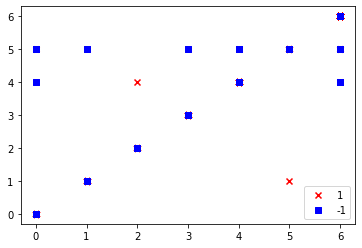

In [56]:
plt.scatter(y_test, y_Prd, c="red", marker='x', label='1')
plt.scatter(yChimp, y_PrdChimp, c="blue", marker='s', label='-1')
plt.legend(loc='lower right')
plt.show()

Predictions of the humans and chimps are closer since they are related genetically.